In [1]:
##Install pyspark in google colab
!pip3 install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 8.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=4e215f60f8446c9eb47e7e3bf883eb284b7aebcafd420462a56d9f48f4a29bb0
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [71]:
# create pyspark session
import pyspark

In [12]:
from pyspark.sql import SparkSession

In [13]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.master("local[*]").getOrCreate()
spark

In [14]:
spark = SparkSession.builder.appName("tutor")\
                            .master("local")\
                            .config("spark.some.config.option", "some-value") \
                            .getOrCreate()

spark

In [15]:
#raw_data = spark.read.format("csv").option("header","true").option("inferSchema", "true").load(r".\\diabetes.csv")
df = spark.read.csv('/content/drive/MyDrive/big data/week 2/diabetes (2) (1).csv',inferSchema=True,header=True)

In [16]:
df

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [18]:
# what are the columns in this dataset
df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [20]:
df.describe().select('Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome').show()

+------------------+------------------+------------------------+------------------+------------------+
|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+------------------+------------------+------------------------+------------------+------------------+
|               768|               768|                     768|               768|               768|
| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
|115.24400235133803| 7.884160320375441|       0.331328595012775|11.760231540678689| 0.476951377242799|
|                 0|               0.0|                   0.078|                21|                 0|
|               846|              67.1|                    2.42|                81|                 1|
+------------------+------------------+------------------------+------------------+------------------+



In [39]:
import numpy as np
from pyspark.sql.functions import when
df = df.withColumn('Insulin',when(df.Insulin==0,np.nan).otherwise(df.Insulin))
df=df.withColumn("BloodPressure",when(df.BloodPressure==0,np.nan).otherwise(df.BloodPressure))
df=df.withColumn("SkinThickness",when(df.SkinThickness==0,np.nan).otherwise(df.SkinThickness))
df=df.withColumn("BMI",when(df.BMI==0,np.nan).otherwise(df.BMI))
df=df.withColumn("Insulin",when(df.Insulin==0,np.nan).otherwise(df.Insulin))

In [40]:
df.select("Insulin","Glucose","BloodPressure","SkinThickness","BMI").show(5)

+-----------------+-------+-------------+-------------+----+
|          Insulin|Glucose|BloodPressure|SkinThickness| BMI|
+-----------------+-------+-------------+-------------+----+
|155.5482233502538|    148|         72.0|         35.0|33.6|
|155.5482233502538|     85|         66.0|         29.0|26.6|
|155.5482233502538|    183|         64.0|          NaN|23.3|
|             94.0|     89|         66.0|         23.0|28.1|
|            168.0|    137|         40.0|         35.0|43.1|
+-----------------+-------+-------------+-------------+----+
only showing top 5 rows



In [41]:
df.describe().select('Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome').show(5)

+-----------------+----+------------------------+------------------+------------------+
|          Insulin| BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-----------------+----+------------------------+------------------+------------------+
|              768| 768|                     768|               768|               768|
|155.5482233502544| NaN|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| 85.0211077692212| NaN|       0.331328595012775|11.760231540678689| 0.476951377242799|
|             14.0|18.2|                   0.078|                21|                 0|
|            846.0| NaN|                    2.42|                81|                 1|
+-----------------+----+------------------------+------------------+------------------+



In [44]:
#impute
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"],outputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"])

model=imputer.fit(df)
df = model.transform(df)
df.show(10)


+-----------+-------+-----------------+------------------+-----------------+-----------------+------------------------+---+-------+
|Pregnancies|Glucose|    BloodPressure|     SkinThickness|          Insulin|              BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-----------------+------------------+-----------------+-----------------+------------------------+---+-------+
|          6|    148|             72.0|              35.0|155.5482233502538|             33.6|                   0.627| 50|      1|
|          1|     85|             66.0|              29.0|155.5482233502538|             26.6|                   0.351| 31|      0|
|          8|    183|             64.0|29.153419593345657|155.5482233502538|             23.3|                   0.672| 32|      1|
|          1|     89|             66.0|              23.0|             94.0|             28.1|                   0.167| 21|      0|
|          0|    137|             40.0|              35.0|            168.0|

In [51]:
#us combine all the features in one single feature vector.
cols = df.columns
cols.remove('Outcome')
# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols,outputCol='feature')
# Now let us use the transform method to transform our dataset
df = assembler.transform(df)
df.select('feature').show(truncate=False)


+-----------------------------------------------------------------------------------+
|feature                                                                            |
+-----------------------------------------------------------------------------------+
|[6.0,148.0,72.0,35.0,155.5482233502538,33.6,0.627,50.0]                            |
|[1.0,85.0,66.0,29.0,155.5482233502538,26.6,0.351,31.0]                             |
|[8.0,183.0,64.0,29.153419593345657,155.5482233502538,23.3,0.672,32.0]              |
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]                                          |
|[0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0]                                        |
|[5.0,116.0,74.0,29.153419593345657,155.5482233502538,25.6,0.201,30.0]              |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]                                          |
|[10.0,115.0,72.40518417462484,29.153419593345657,155.5482233502538,35.3,0.134,29.0]|
|[2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0]          

In [52]:
from pyspark.ml.feature import StandardScaler
standardscaler = StandardScaler().setInputCol('feature').setOutputCol('Scaled_features')
df = standardscaler.fit(df).transform(df)
df.select('feature','Scaled_features').show(10)

+--------------------+--------------------+
|             feature|     Scaled_features|
+--------------------+--------------------+
|[6.0,148.0,72.0,3...|[1.78063837321943...|
|[1.0,85.0,66.0,29...|[0.29677306220323...|
|[8.0,183.0,64.0,2...|[2.37418449762590...|
|[1.0,89.0,66.0,23...|[0.29677306220323...|
|[0.0,137.0,40.0,3...|[0.0,4.2849165233...|
|[5.0,116.0,74.0,2...|[1.48386531101619...|
|[3.0,78.0,50.0,32...|[0.89031918660971...|
|[10.0,115.0,72.40...|[2.96773062203238...|
|[2.0,197.0,70.0,4...|[0.59354612440647...|
|[8.0,125.0,96.0,2...|[2.37418449762590...|
+--------------------+--------------------+
only showing top 10 rows



In [53]:
#Train, test split
train,test = df.randomSplit([0.8,0.2],seed=12345)

In [62]:
 #imbalance in the dataset
 df_size = float(train.select('Outcome').count())
 numPostive = train.select('Outcome').where('Outcome == 1').count()
 per_ones = (float(numPostive)/float(df_size))*100
 numNegative = float(df_size - numPostive)
print('The number of ones are {}'.format(numPostive))
print('Percentage of ones are {}'.format(per_ones))

The number of ones are 219
Percentage of ones are 34.92822966507177


In [63]:
BalancingRatio= numNegative/df_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.6507177033492823


In [64]:
# balance 
train = train.withColumn('classWeights',when(train.Outcome==1,BalancingRatio).otherwise(1-BalancingRatio))
train.select('classWeights').show()

+-------------------+
|       classWeights|
+-------------------+
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
| 0.6507177033492823|
|0.34928229665071775|
|0.34928229665071775|
|0.34928229665071775|
+-------------------+
only showing top 20 rows



In [65]:
#Feature selection
# Feature selection using chisquareSelector
from pyspark.ml.feature import ChiSqSelector

css = ChiSqSelector(featuresCol='Scaled_features',outputCol='Aspect',labelCol='Outcome',fpr=0.05)
train = css.fit(train).transform(train)
test = css.fit(test).transform(test)
test.select("Aspect").show(5,truncate=False)



+----------------------------------------------------------------------------------------------------------------------------------------+
|Aspect                                                                                                                                  |
+----------------------------------------------------------------------------------------------------------------------------------------+
|[0.0,2.6272480873267474,6.778906518747398,3.526357045954172,1.4702231396384098,5.556241336417194,0.7032293726142661,1.955743806611537]  |
|[0.0,3.1589530573809705,5.290853868290652,1.93380870262003,1.8295247783934943,3.0544782215906037,0.7605742570763735,1.785679127775751]  |
|[0.0,3.1589530573809705,5.373523459982693,3.1850966866682846,1.8295247783934943,3.5781030595775647,0.7153019798694465,1.870711467193644]|
|[0.0,3.1902298203253365,6.2002193769031075,2.616329421191805,1.8295247783934943,4.720981710256498,1.726382837490816,1.785679127775751]  |
|[0.0,3.2840601091584345,5.

In [68]:
#Building a classification model using Logistic Regression
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol='Outcome',featuresCol='Aspect',weightCol='classWeights',maxIter=10)
model = lr.fit(train)
predict_train =  model.transform(train)
predict_test = model.transform(test)
predict_test.select('Outcome','prediction').show(10)


+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       1.0|
|      1|       1.0|
|      1|       1.0|
+-------+----------+
only showing top 10 rows



In [69]:
#Evaluating the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="Outcome")
predict_test.select("Outcome","rawPrediction","prediction","probability").show(5)

+-------+--------------------+----------+--------------------+
|Outcome|       rawPrediction|prediction|         probability|
+-------+--------------------+----------+--------------------+
|      0|[1.68926464236830...|       0.0|[0.84412742871331...|
|      0|[2.76116625856994...|       0.0|[0.94054088906675...|
|      0|[2.42526935318258...|       0.0|[0.91873403305078...|
|      0|[1.39997353027292...|       0.0|[0.80217968817905...|
|      0|[2.74538584670097...|       0.0|[0.93965223021091...|
+-------+--------------------+----------+--------------------+
only showing top 5 rows



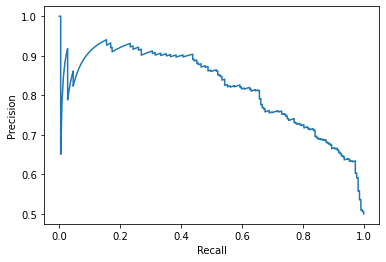

In [70]:
print(model.summary)
import matplotlib.pyplot as plt
pr = model.summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()